### Introduction to Matplotlib

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

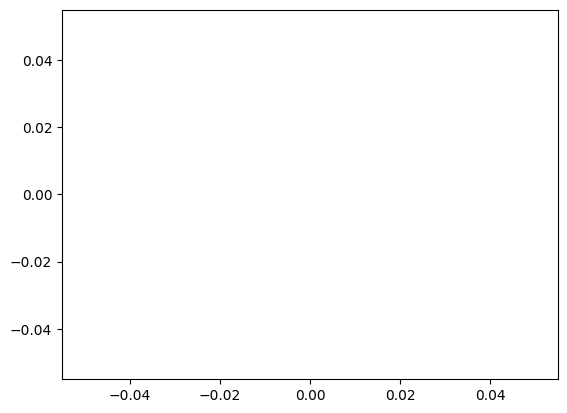

In [12]:
plt.plot()

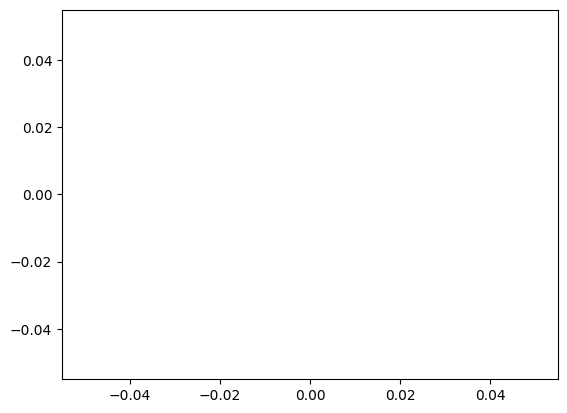

In [13]:
plt.plot();

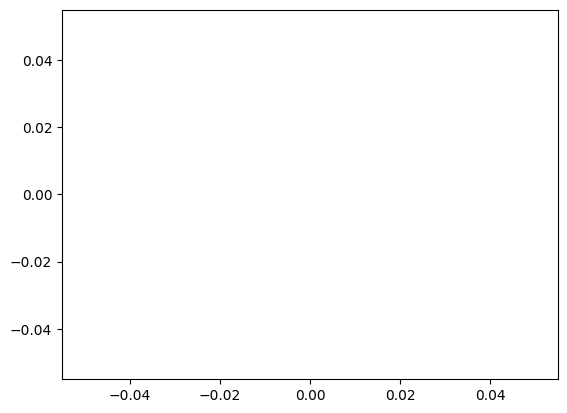

In [4]:
plt.plot()
plt.show()

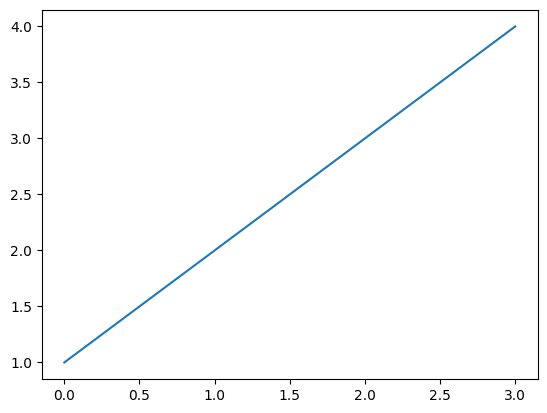

In [14]:
plt.plot([1,2,3,4]);

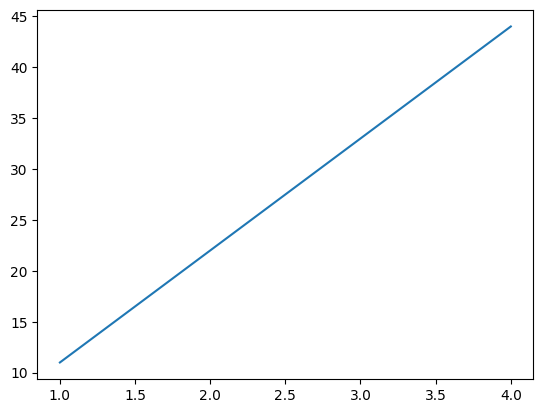

In [3]:
x = [1,2,3,4]
y = [11,22,33,44]
plt.plot(x,y);

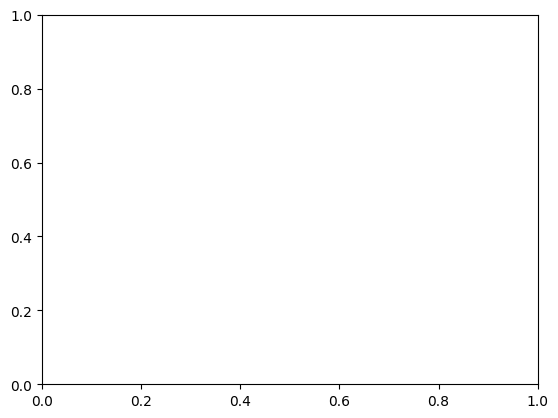

In [8]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

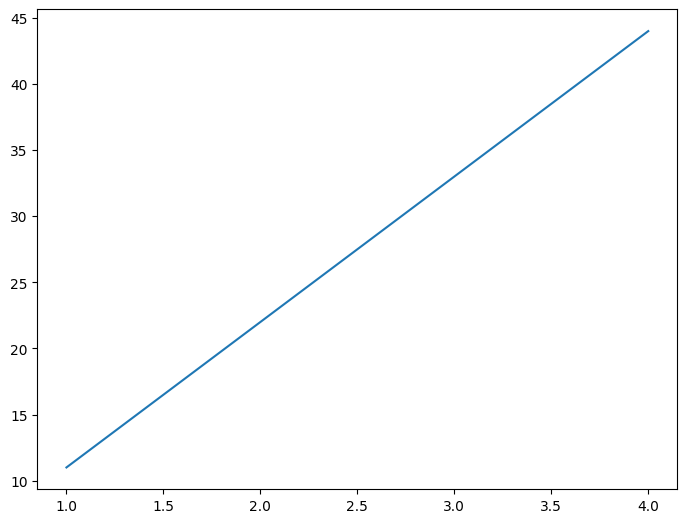

In [16]:
# 2nd method
fig = plt.figure() # creates a figure
ax = fig.add_axes([1,1,1,1])
ax.plot(x,y)
plt.show()

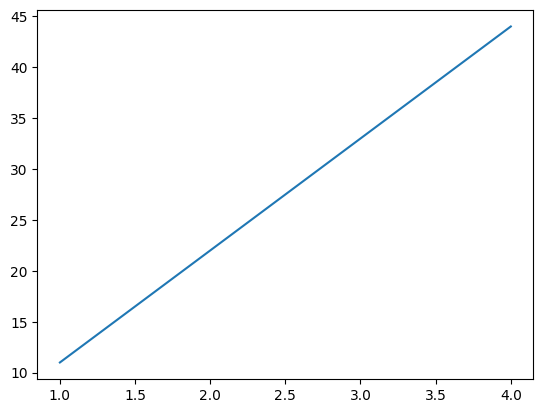

In [17]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,y); #add some data

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

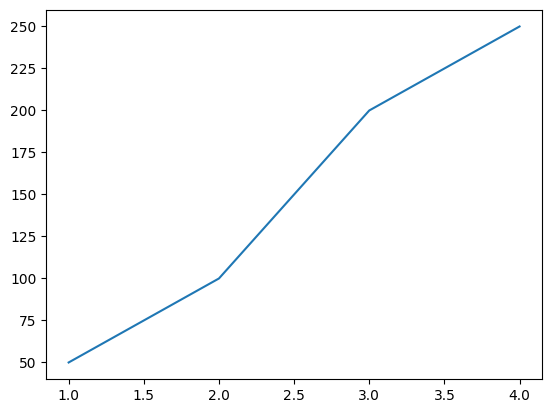

In [18]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x,[50,100,200,250]); #add some data
type(fig), type(ax)

## Matplotlib example workflow

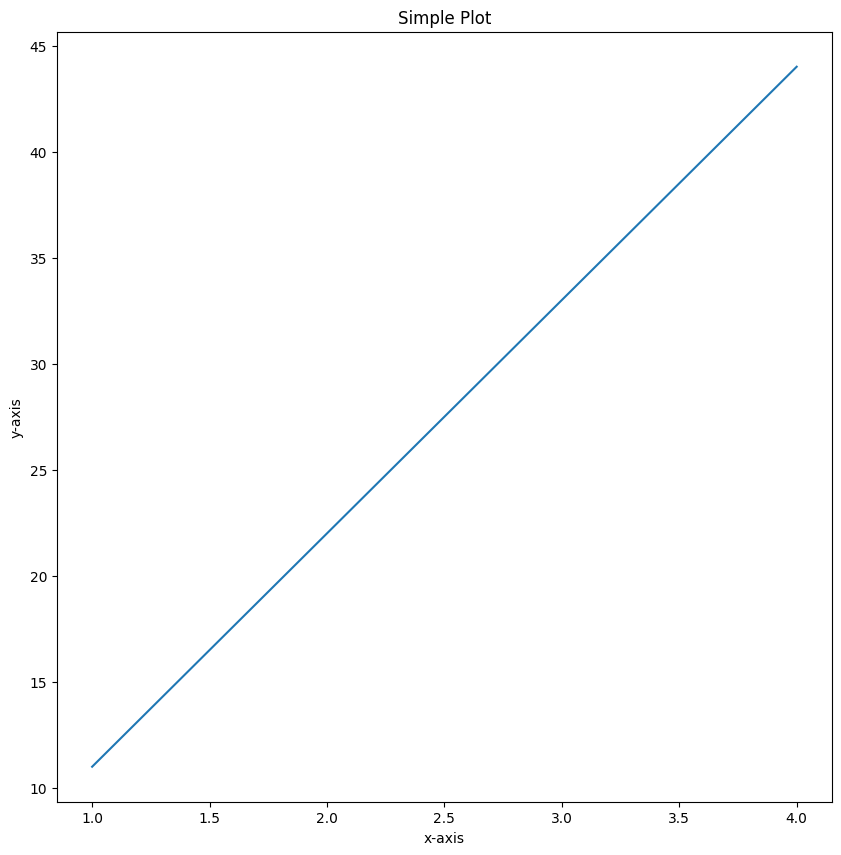

In [19]:
# 0. import matplotlib and get it ready for plotting in Jupyter
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x= [1,2,3,4]
y = [11,22,33,44]

# 2. Setup plot
fig, ax = plt.subplots(figsize =(10,10)) # width, height

# 3. Plot data
ax.plot(x,y)

# 4. Customize plot
ax.set(title = "Simple Plot",
       xlabel = "x-axis",
       ylabel = "y-axis")

# 5. Save & show (you have the whole figure)
fig.savefig("images/sample-plot.png")

### Making figures with NumPy arrays

We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

In [20]:
import numpy as np

In [22]:
# Create some data
x=np.linspace(0,10,100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

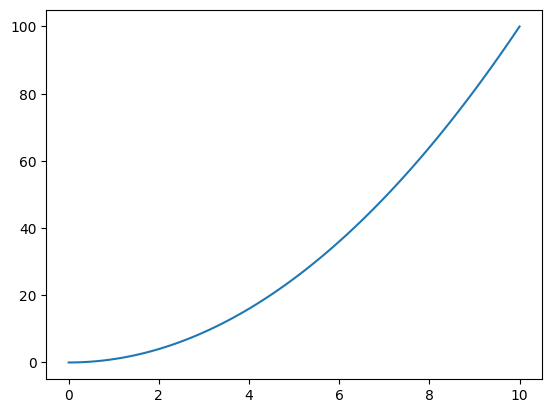

In [23]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x,x**2);

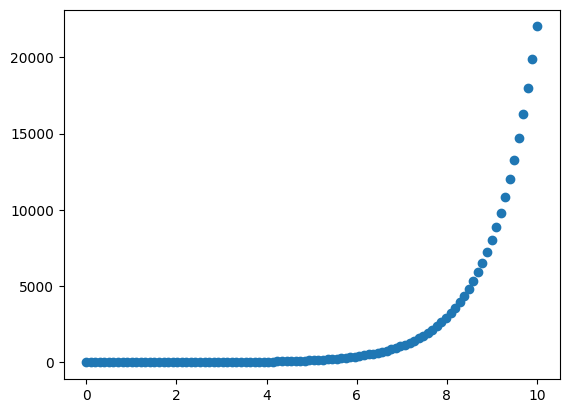

In [24]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x,np.exp(x));

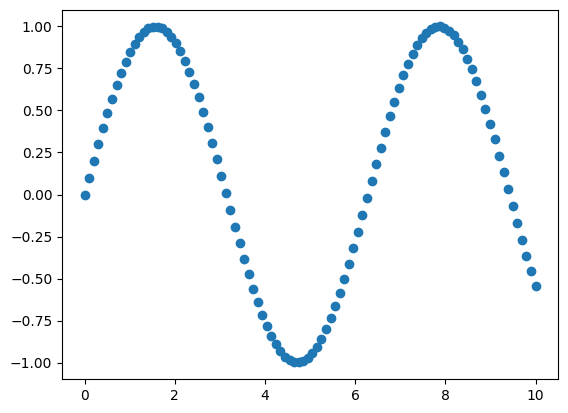

In [25]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x,np.sin(x));

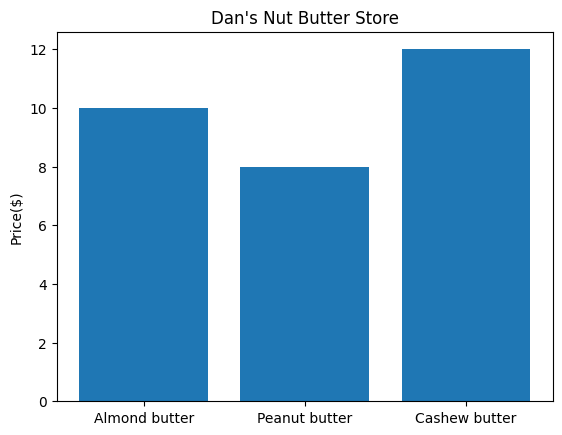

In [30]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter" : 10,
                     "Peanut butter" : 8,
                     "Cashew butter" : 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values())
ax.set(title="Dan's Nut Butter Store",
       ylabel = "Price($)");

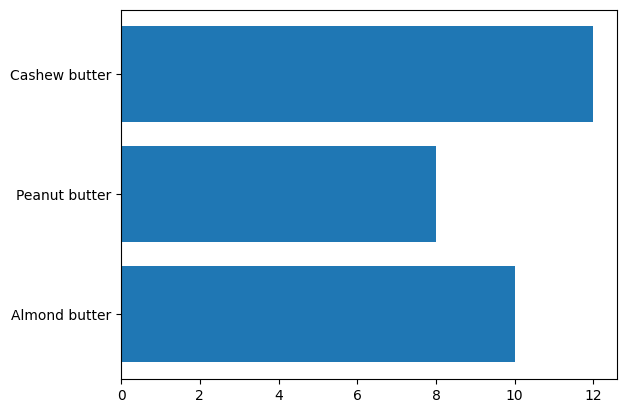

In [31]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()),list(nut_butter_prices.values()));

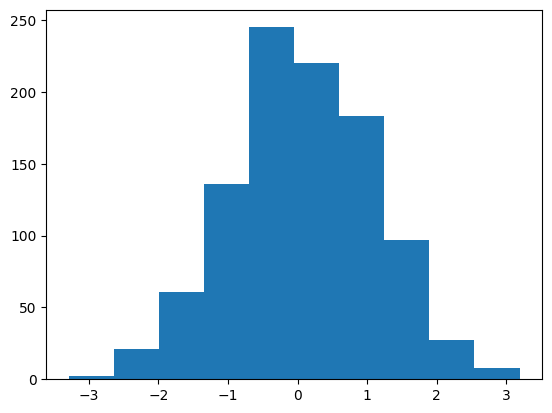

In [33]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

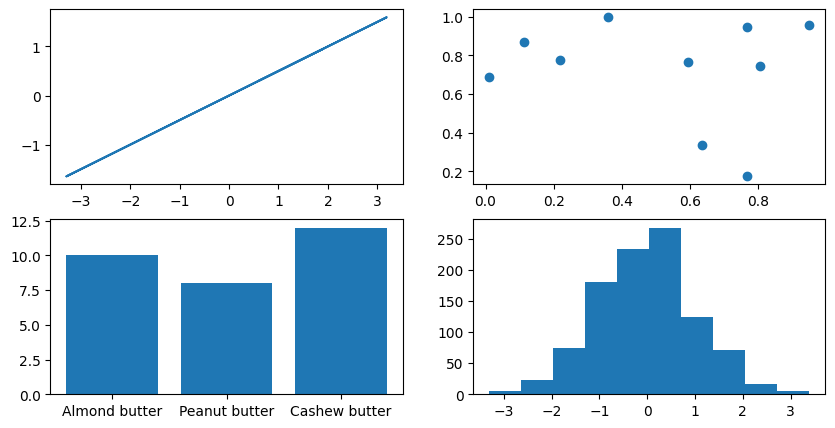

In [38]:
# Subplots option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(10,5))

# Plot to each different axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

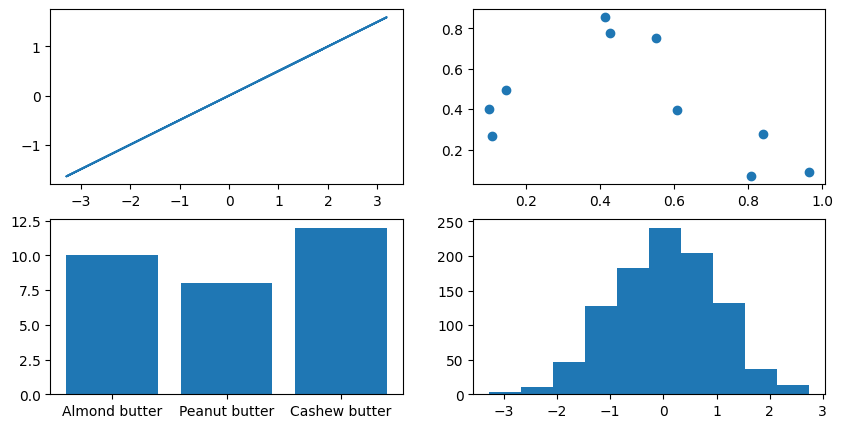

In [40]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))

# Plot to each differnet index
ax[0,0].plot(x, x/2);
ax[0,1].scatter(np.random.random(10), np.random.random(10));
ax[1,0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1,1].hist(np.random.randn(1000));

### Plotting from pandas DataFrames

In [46]:
import pandas as pd

In [63]:
# Make a dataframe
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<Axes: >

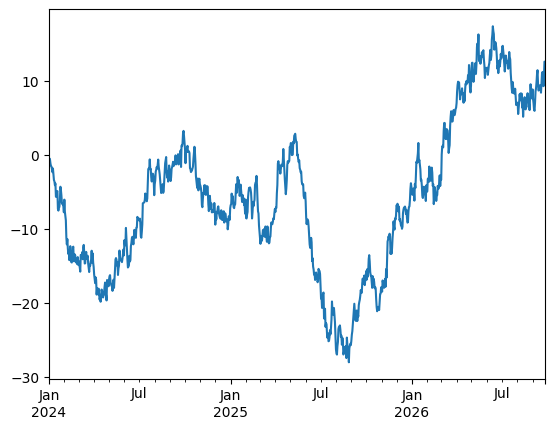

In [44]:
ts = pd.Series(np.random.randn(1000),
               index = pd.date_range('1/1/2024',periods=1000))
ts = ts.cumsum()
ts.plot()

In [64]:
car_sales["Price"] = car_sales["Price"].replace(r'[\$,]', '', regex=True)
# car_sales["Price"] = car_sales["Price"].astype(int)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.00
1,Honda,Red,87899,4,5000.00
2,Toyota,Blue,32549,3,7000.00
3,BMW,Black,11179,5,22000.00
4,Nissan,White,213095,4,3500.00
5,Toyota,Green,99213,4,4500.00
6,Honda,Blue,45698,4,7500.00
7,Honda,Blue,54738,4,7000.00
8,Toyota,White,60000,4,6250.00
9,Nissan,White,31600,4,9700.00


In [65]:
# Remove last two zeroes
car_sales["Price"] = car_sales["Price"].str[:-3]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [66]:
car_sales["Sale Date"] = pd.date_range("1/1/2024",periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2024-01-01
1,Honda,Red,87899,4,5000,2024-01-02
2,Toyota,Blue,32549,3,7000,2024-01-03
3,BMW,Black,11179,5,22000,2024-01-04
4,Nissan,White,213095,4,3500,2024-01-05
5,Toyota,Green,99213,4,4500,2024-01-06
6,Honda,Blue,45698,4,7500,2024-01-07
7,Honda,Blue,54738,4,7000,2024-01-08
8,Toyota,White,60000,4,6250,2024-01-09
9,Nissan,White,31600,4,9700,2024-01-10


In [67]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


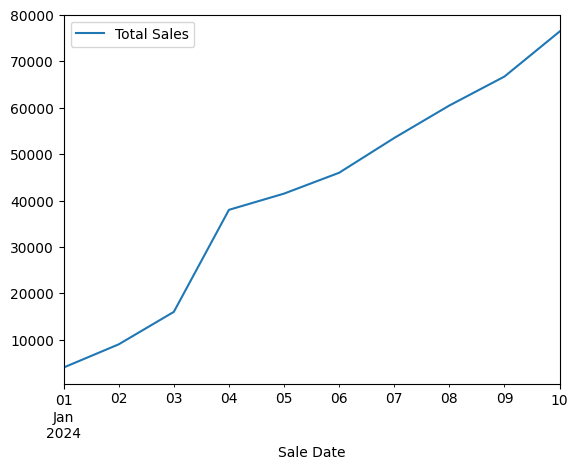

In [52]:
# Let's plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

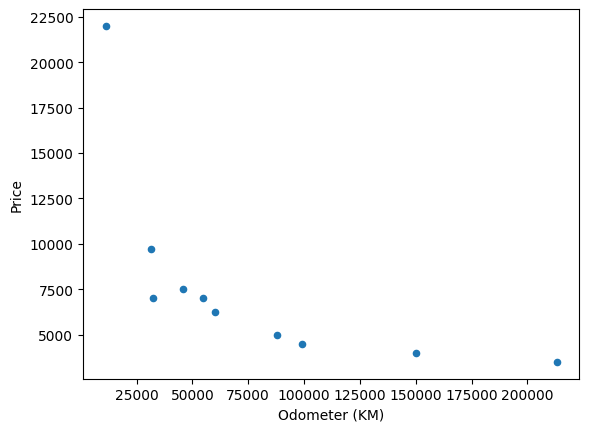

In [68]:
# Reassign price column to int
car_sales["Price"] = car_sales["Price"].astype(int)

#Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [55]:
# How about a bar graph?
x=np.random.rand(10,4)
x

# Turn it into a dataframe
df = pd.DataFrame(x, columns=['a','b','c','d'])
df

,a,b,c,d
0,0.516012,0.179206,0.927651,0.475813
1,0.528622,0.830694,0.415651,0.689061
2,0.431667,0.244119,0.671193,0.448712
3,0.077926,0.988524,0.354849,0.527141
4,0.897291,0.376442,0.231649,0.944490
5,0.625863,0.642873,0.738666,0.444286
6,0.774582,0.409397,0.543711,0.058021
7,0.984724,0.140723,0.643324,0.773741
8,0.094856,0.058730,0.418324,0.119834
9,0.786648,0.961269,0.500778,0.293975


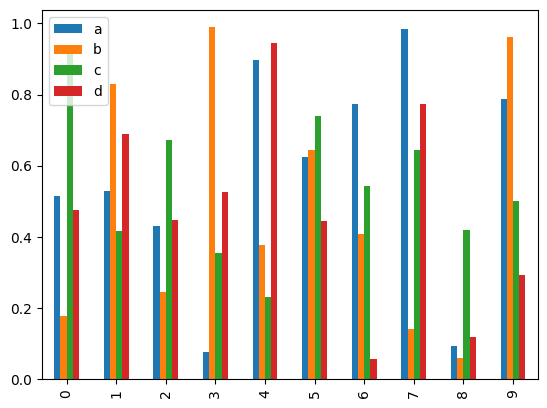

In [56]:
df.plot.bar();

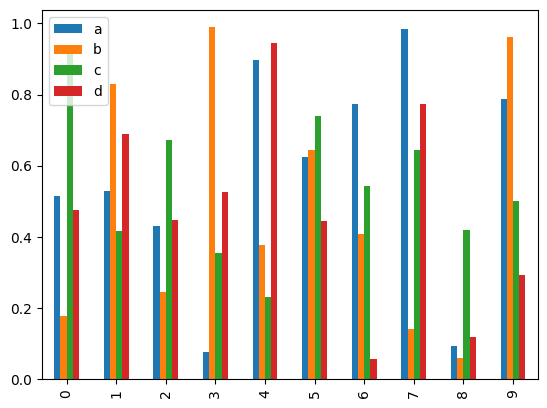

In [57]:
df.plot(kind="bar");

In [58]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2024-01-01,4000
1,Honda,Red,87899,4,5000,2024-01-02,9000
2,Toyota,Blue,32549,3,7000,2024-01-03,16000
3,BMW,Black,11179,5,22000,2024-01-04,38000
4,Nissan,White,213095,4,3500,2024-01-05,41500
5,Toyota,Green,99213,4,4500,2024-01-06,46000
6,Honda,Blue,45698,4,7500,2024-01-07,53500
7,Honda,Blue,54738,4,7000,2024-01-08,60500
8,Toyota,White,60000,4,6250,2024-01-09,66750
9,Nissan,White,31600,4,9700,2024-01-10,76450


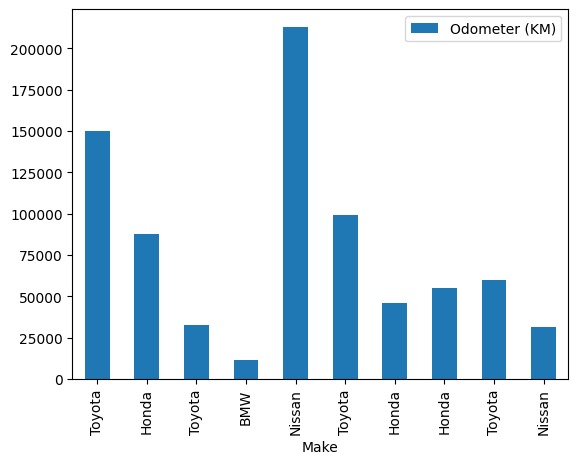

In [59]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

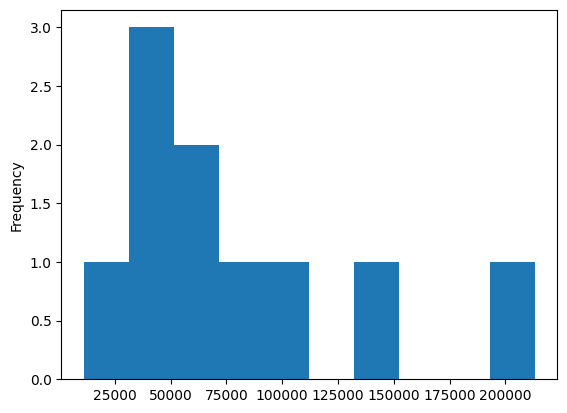

In [60]:
# How about histograms?

car_sales["Odometer (KM)"].plot.hist();

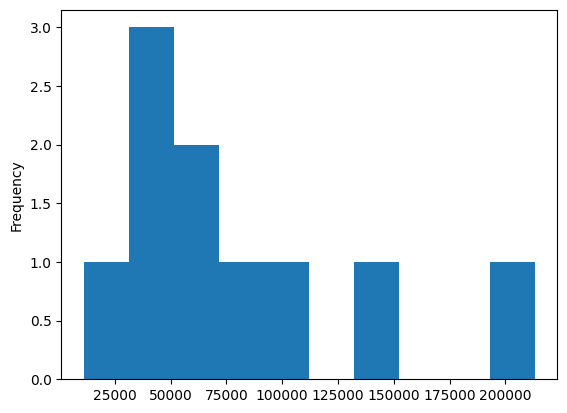

In [61]:
car_sales["Odometer (KM)"].plot(kind="hist");

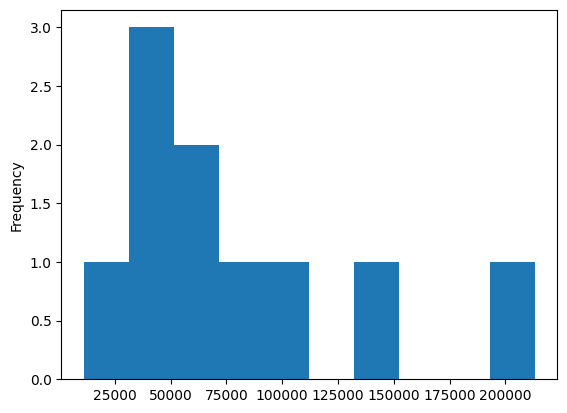

In [3]:
car_sales["Odometer (KM)"].plot.hist(bins=10);

In [4]:
# Let's try another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


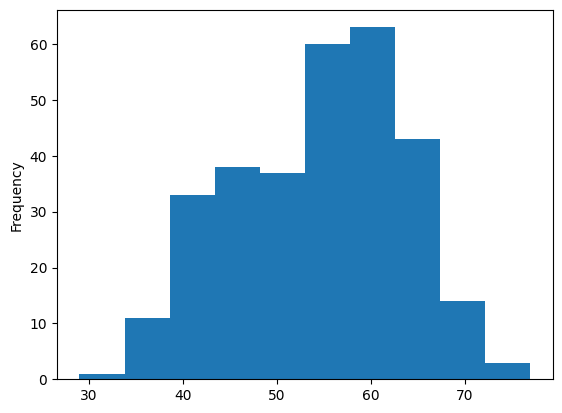

In [5]:
# Create a histogram of age
heart_disease["age"].plot.hist();

In [6]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


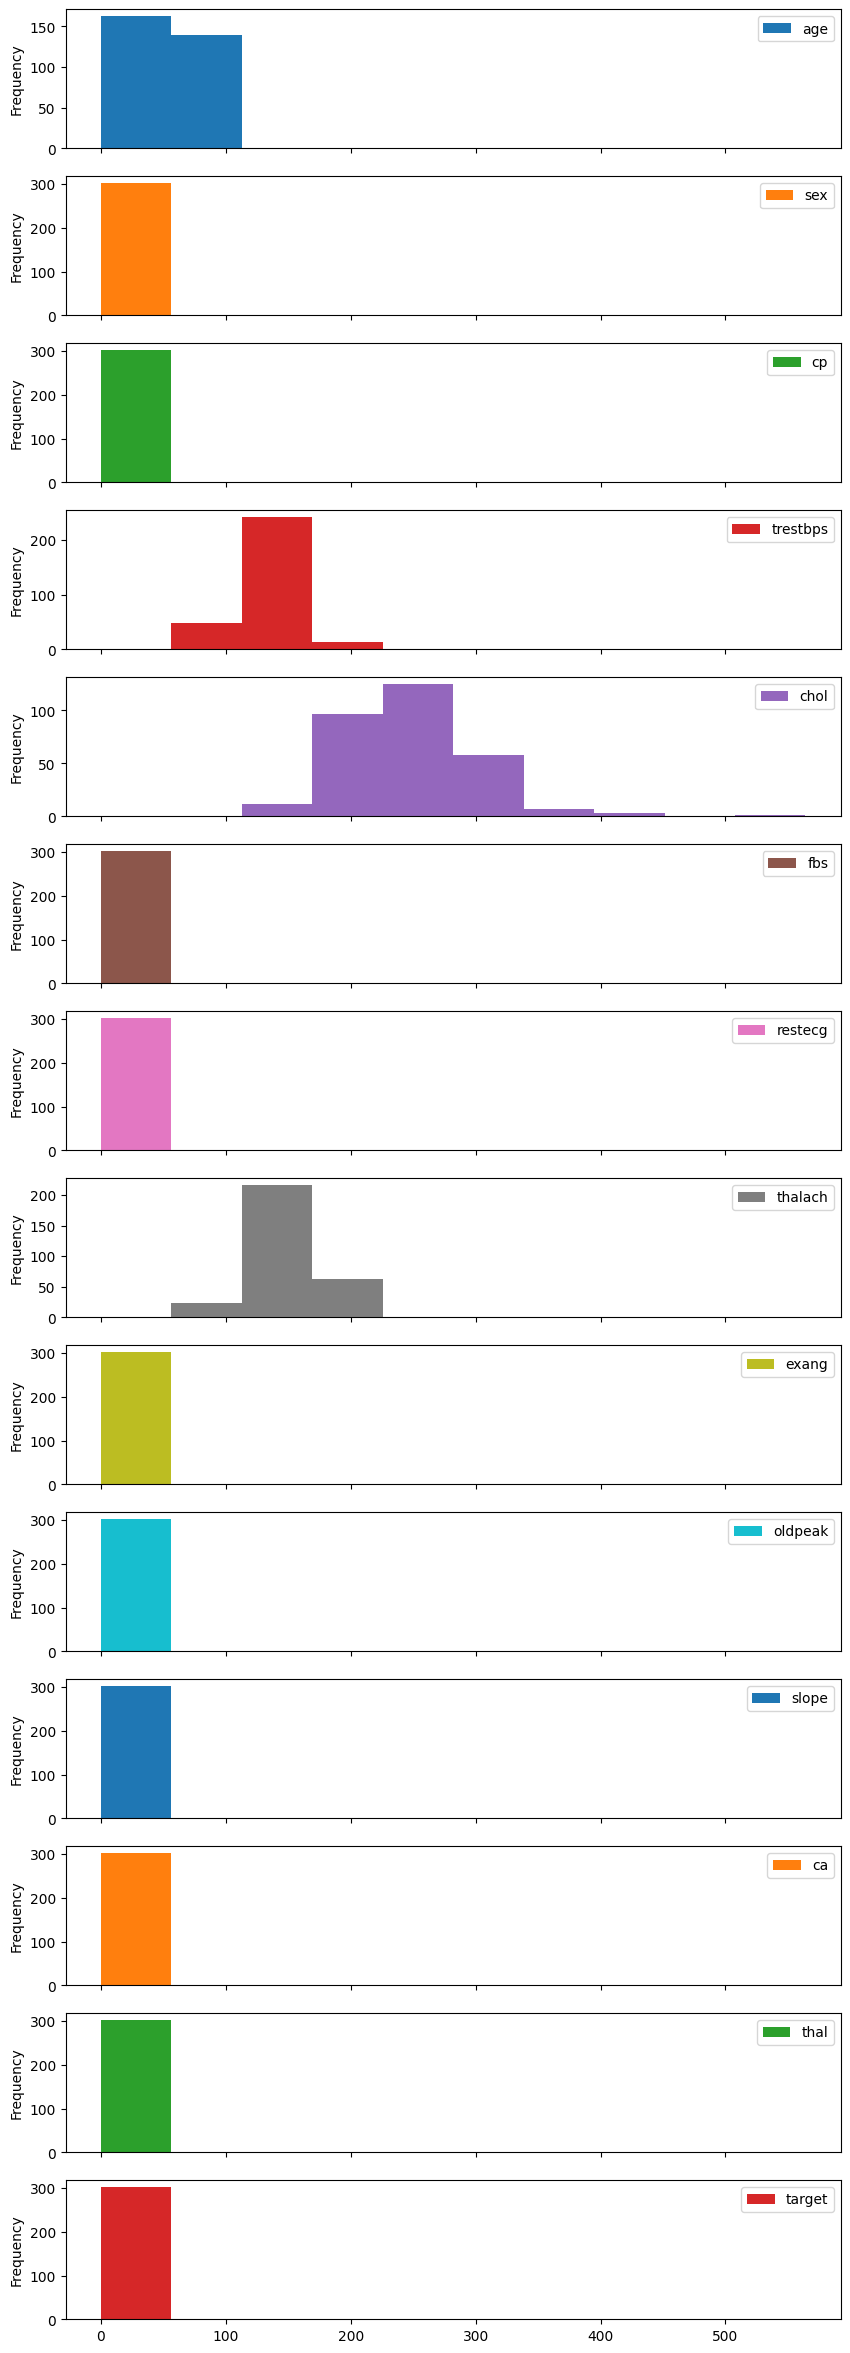

In [8]:
heart_disease.plot.hist(figsize=(10,30),subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
over_50 = heart_disease[heart_disease["age"]>50]
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


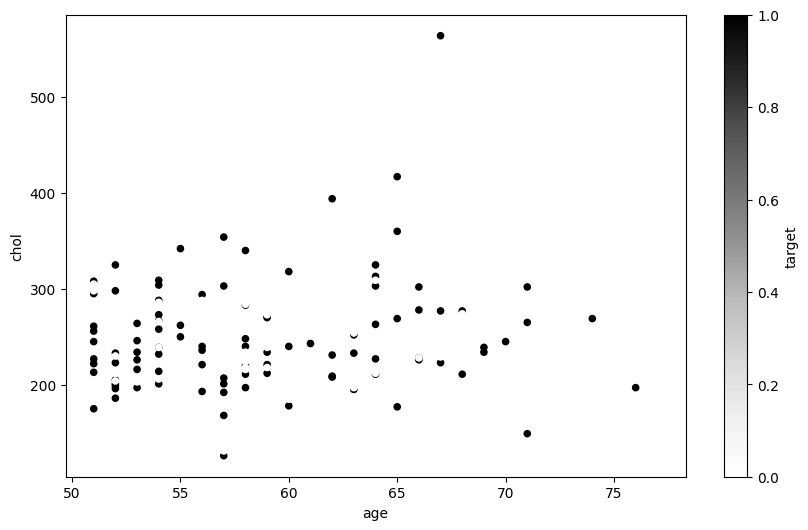

In [16]:
# Pyplot method
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
            figsize=(10,6));

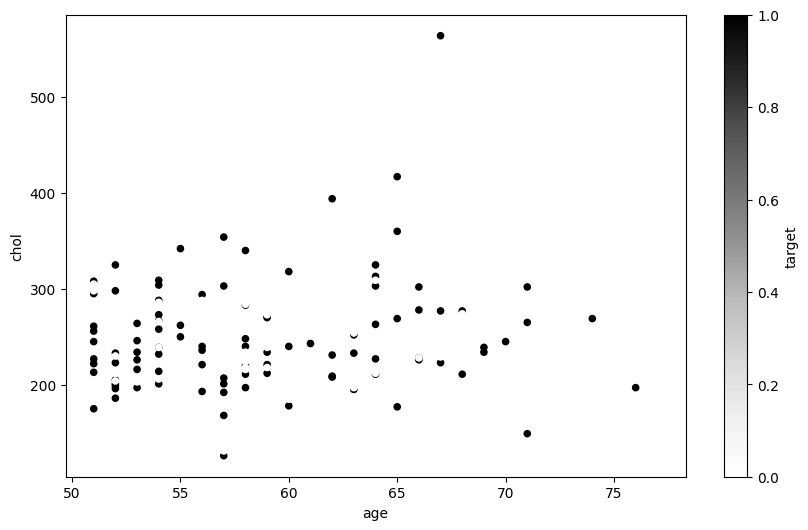

In [18]:
## OO method mixed with pyplot method
fix,ax = plt.subplots(figsize=(10,6))
over_50.plot(kind='scatter',
             x='age',
             y='chol',
             c='target',
             ax=ax);
#ax.set_xlim([45,100])

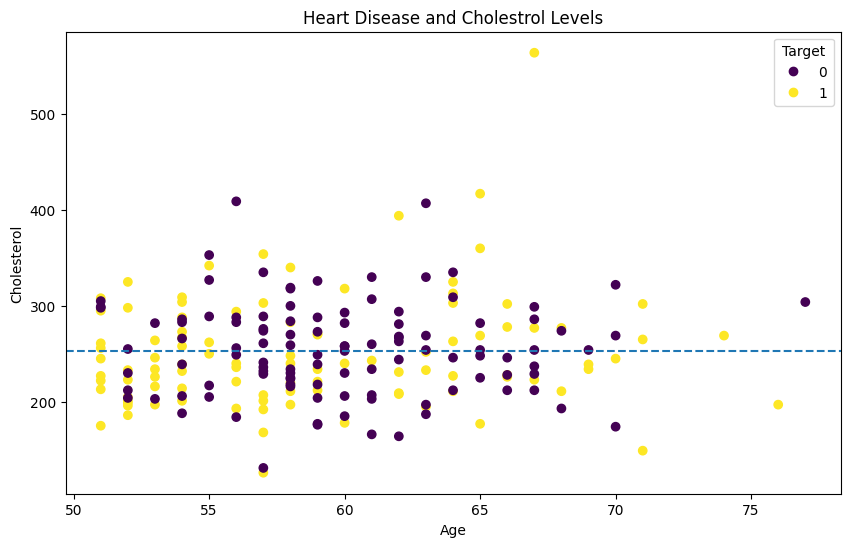

In [24]:
## OO method from scratch
fig, ax = plt.subplots(figsize= (10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"]);
# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle='--');

In [23]:
over_50.target.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [25]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


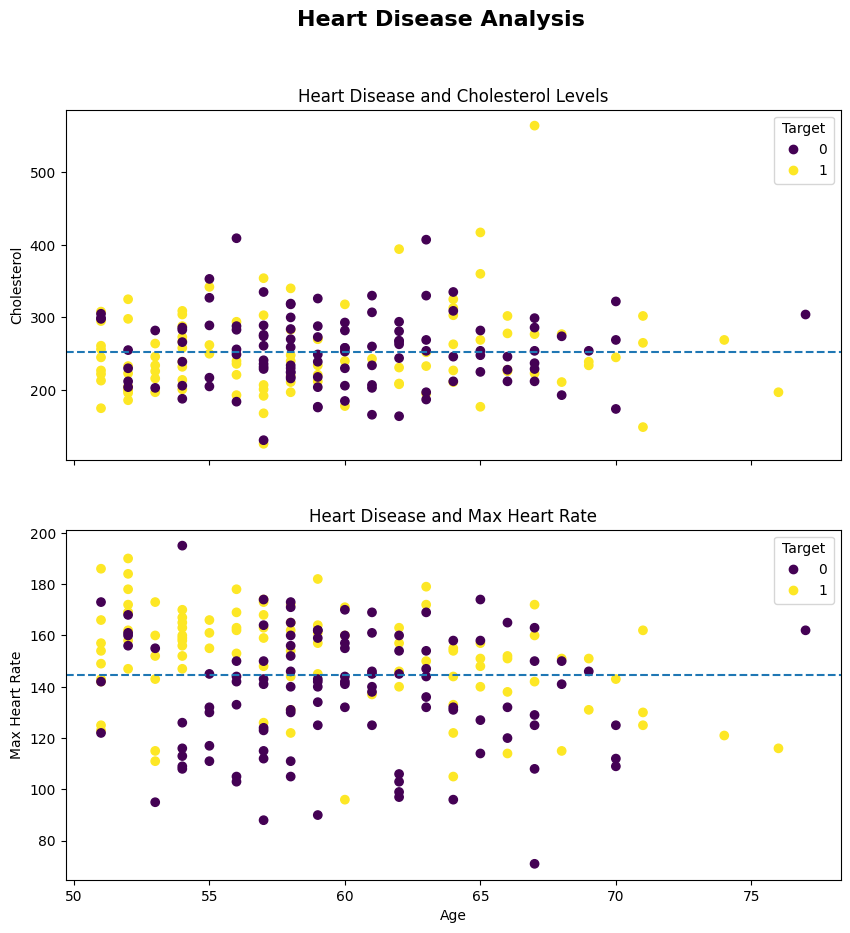

In [29]:
# Subplot of chol, age thalach
fig,(ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                             sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"])

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"])
# Customize ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
        ylabel="Max Heart Rate");

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


## Customizing Matplotlib plots and getting stylish

In [30]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

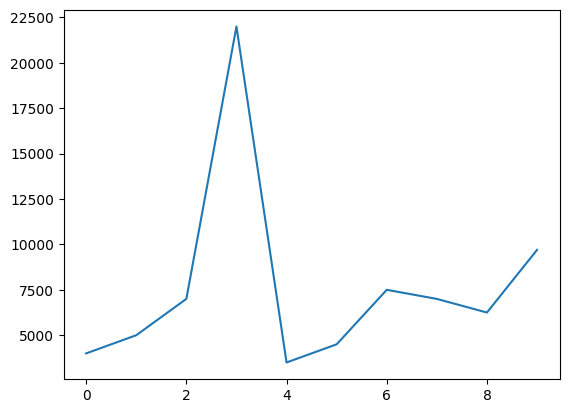

In [69]:
car_sales["Price"].plot();

In [71]:
plt.style.use('seaborn-v0_8-whitegrid')

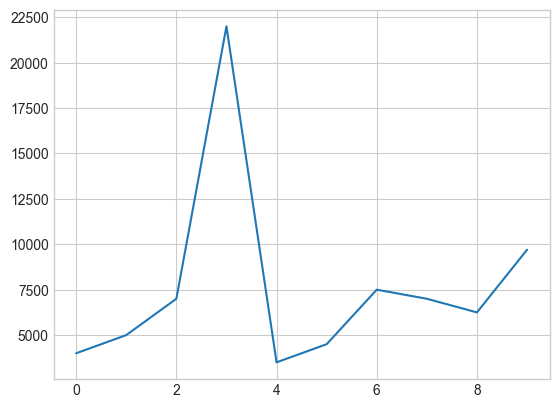

In [72]:
car_sales["Price"].plot();

In [73]:
plt.style.use('seaborn-v0_8')

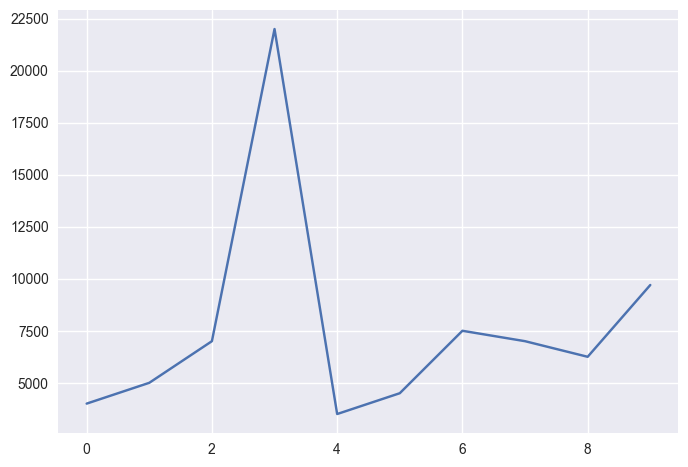

In [74]:
car_sales["Price"].plot();

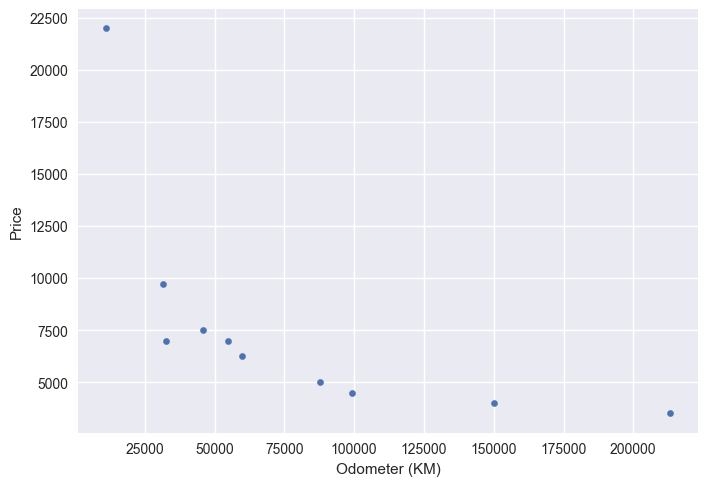

In [75]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

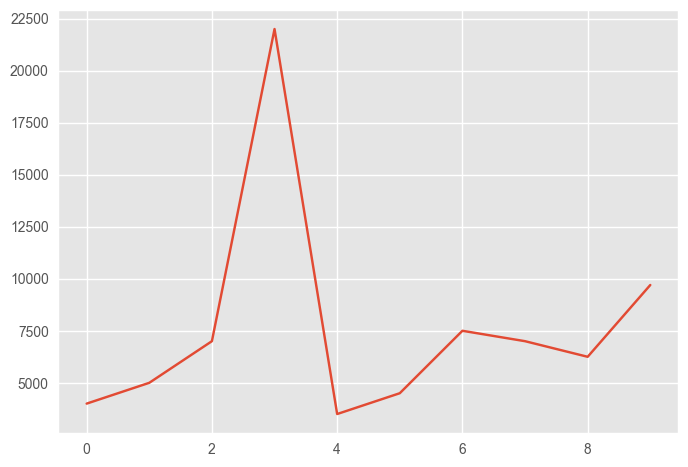

In [76]:
plt.style.use('ggplot')
car_sales["Price"].plot();

In [77]:
# Create some data
x= np.random.randn(10,4)
x

array([[-0.80462913, -0.0199565 ,  1.11947578,  0.11859539],
       [-0.94838426,  1.11091791,  0.029509  , -0.73507947],
       [ 0.56278815,  0.85550891,  0.55155463,  1.01847904],
       [ 0.68751324, -0.17471015, -1.43079765,  0.71059184],
       [-0.11051111,  0.09617472,  1.33049621,  0.18798582],
       [ 0.06732119,  0.20576579,  0.62623794, -0.26410303],
       [ 0.52245803, -0.26270884, -0.78160606,  0.99622167],
       [ 0.06582562, -1.38005224,  0.85810472,  0.79713143],
       [-0.4824203 , -0.62225621, -1.68201672, -1.48460571],
       [-0.32604822,  0.61885929,  1.51748328,  2.01805989]])

In [78]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.804629,-0.019957,1.119476,0.118595
1,-0.948384,1.110918,0.029509,-0.735079
2,0.562788,0.855509,0.551555,1.018479
3,0.687513,-0.174710,-1.430798,0.710592
4,-0.110511,0.096175,1.330496,0.187986
5,0.067321,0.205766,0.626238,-0.264103
6,0.522458,-0.262709,-0.781606,0.996222
7,0.065826,-1.380052,0.858105,0.797131
8,-0.482420,-0.622256,-1.682017,-1.484606
9,-0.326048,0.618859,1.517483,2.018060


matplotlib.axes._axes.Axes

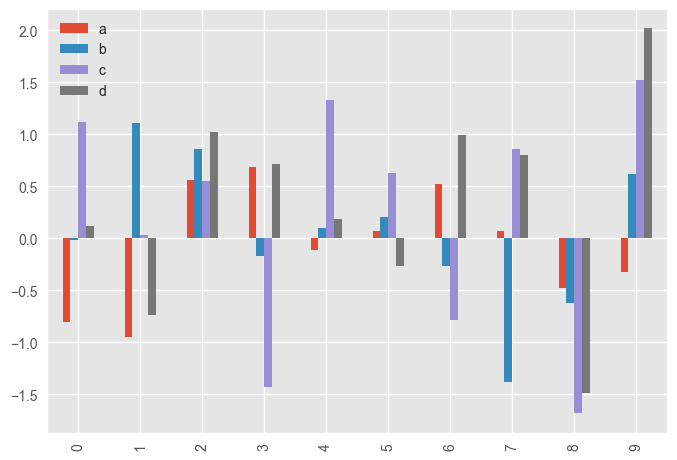

In [79]:
ax = df.plot(kind='bar')
type(ax)

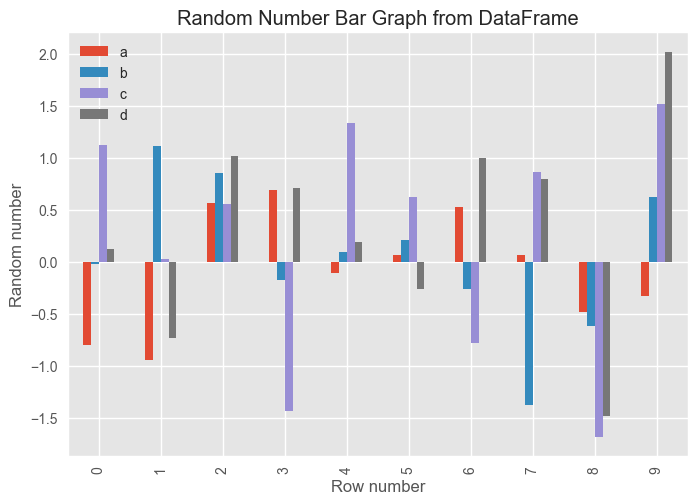

In [80]:
# Customize our plot with the set() method
ax = df.plot(kind="bar")
# Add some labels and a title 
ax.set(title="Random Number Bar Graph from DataFrame",
       xlabel = "Row number",
       ylabel="Random number")
# Make the legend visible
ax.legend().set_visible(True)

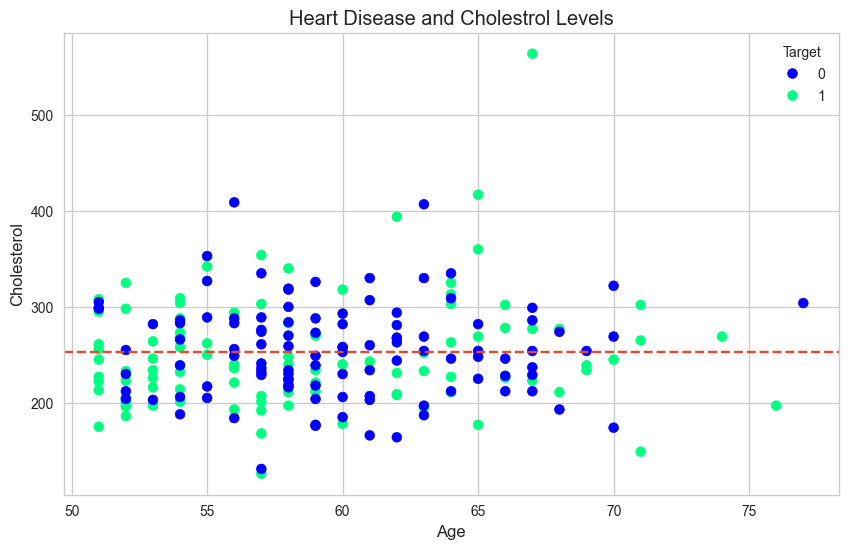

In [82]:
# Set the style
plt.style.use('seaborn-v0_8-whitegrid')

## OO method from scratch
fig, ax = plt.subplots(figsize= (10,6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                    cmap="winter"); #this changes the color scheme
# Customize the plot
ax.set(title="Heart Disease and Cholestrol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["chol"].mean(),
           linestyle='--');

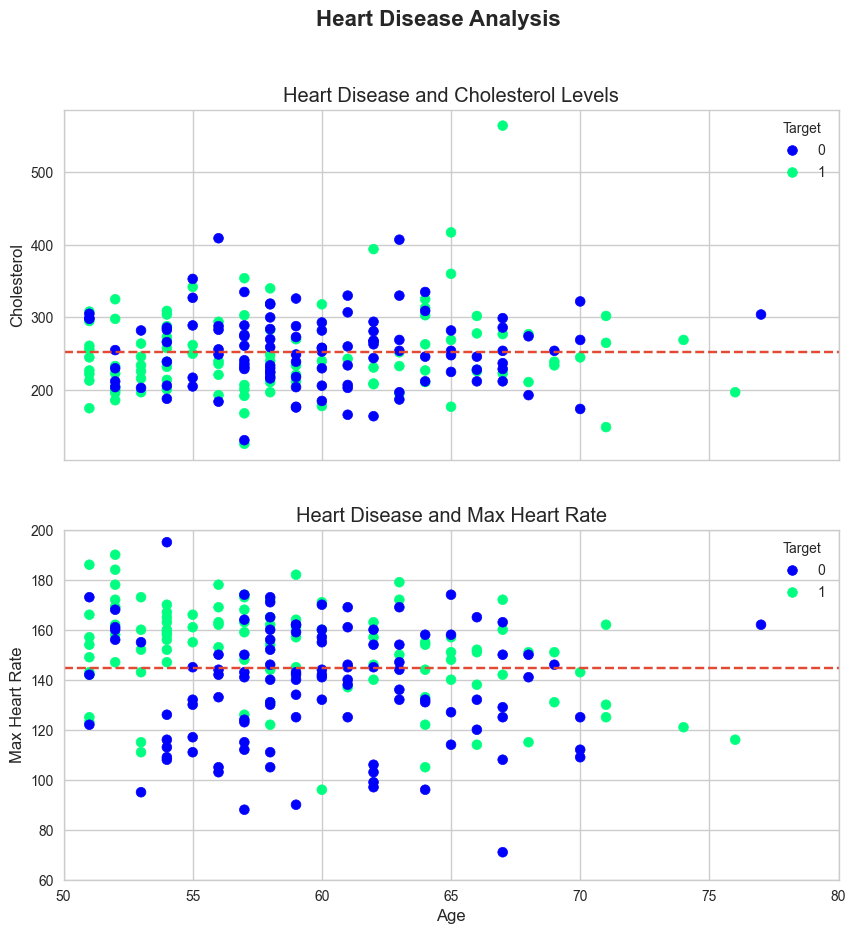

In [89]:
# Customzing the y and x axis limitations

# Subplot of chol, age thalach
fig,(ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10,10),
                             sharex=True)

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                      y=over_50["chol"],
                      c=over_50["target"],
                     cmap="winter")

# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

# Change the x axis limits
ax0.set_xlim([50,80])


# Add a legend to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
            linestyle="--");


# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                      y=over_50["thalach"],
                      c=over_50["target"],
                     cmap="winter")
# Customize ax1
ax1.set(title = "Heart Disease and Max Heart Rate",
        xlabel = "Age",
        ylabel="Max Heart Rate");
# Change ax1 x axis and y axis limits
ax1.set_xlim([50,80])
ax1.set_ylim([60,200])

# Add a legend to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
            linestyle="--");

# Add a title to the figure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");


In [90]:
fig.savefig("images/heart-disease-analysis-plot-saved-with-code.png")